In [1]:
import pylab, random, math
import numpy as np
from cvxopt.solvers import qp
from cvxopt.base import matrix

#####test data#####
classA1 = [(random.normalvariate(-1.5, 1), random.normalvariate(0.5, 1), 1.0) for i in range(5)] + \
         [(random.normalvariate(1.5, 1), random.normalvariate(0.5, 1), 1.0) for i in range(5)]
classB1 = [(random.normalvariate(3, 0.5), random.normalvariate(-1.5, 0.5), -1.0) for i in range(10)]
data1 = classA1 + classB1
random.shuffle(data1)

In [2]:
classA = [(random.normalvariate(-1.5, 1), random.normalvariate(0.5, 1), 1.0) for i in range(5)] + \
         [(random.normalvariate(1.5, 1), random.normalvariate(0.5, 1), 1.0) for i in range(5)]
classB = [(random.normalvariate(0.0, 0.5), random.normalvariate(-0.5, 0.5), -1.0) for i in range(10)]
data = classA + classB
random.shuffle(data)

In [3]:
def original_plot(classA,classB):
    pylab.plot([p[0] for p in classA],[p[1] for p in classA],'bo')
    pylab.plot([p[0] for p in classB],[p[1] for p in classB],'ro')
    pylab.title('Original Data')
    pylab.xlabel('X1')
    pylab.ylabel('X2')
    pylab.show() 
    
# Kernel function
def Kernel(x, y, Option, p):
    kValue = 0
    if Option == "L":  # Linear
        kValue = np.dot(x, y) + 1
    elif Option == "P":  # Poly
        kValue = pow(np.dot(x, y) + 1, p)
    elif Option == "R":  # RBF
        theta = p
        kValue = math.exp(-np.dot(np.matrix(x)-np.matrix(y), (np.matrix(x)-np.matrix(y)).transpose())/(2*pow(theta, 2)))
        #kValue = math.exp(-np.dot(x - y, x - y)/(2*pow(theta, 2)))
    elif Option == "S":  # Sig
        kValue = math.tanh(p*np.dot(x, y) - -(-10))
    return kValue

def get_P(data, K, p):
    P = np.zeros((len(data), len(data)))
    for i in range(len(data)):
        for j in range(len(data)):
            P[i,j] = data[i][2]*data[j][2]*Kernel(data[i][0:2], data[j][0:2], K, p)  
        
    return P

# Train data
def train_data(data,Option,p):   
    P = get_P(data,Option,p)
    h = np.zeros((len(data), 1))
    G = np.diag([-1.0]*len(data))
    q = -1*np.ones((len(data), 1))

    r = qp(matrix(P), matrix(q), matrix(G), matrix(h))
    alpha = list(r['x'])
    print(alpha)

    support = []
    for i in range(len(alpha)):
        if alpha[i] > 10e-5:
            support.append((data[i][0], data[i][1], data[i][2], alpha[i]))
    return support

def indicator(xstar, support, Option, p):
    ind = 0
    for i in range(len(support)):
        ind += support[i][3]*support[i][2]*Kernel(xstar, support[i][0:2], Option, p)
    return ind

def boundary_plot(classA, classB, support, Option, p):
    xrange = np.arange(-4, 4, 0.05)
    yrange = np.arange(-4, 4, 0.05)
    grid = matrix([[indicator([x, y], support, Option, p) for y in yrange] for x in xrange])
    pylab.contour(xrange, yrange, grid, (-1.0, 0.0, 1.0), colors = ('red', 'black', 'blue'), linewidths = (1, 3, 1))
    pylab.plot([p[0] for p in classA],[p[1] for p in classA],'bo')
    pylab.plot([p[0] for p in classB],[p[1] for p in classB],'ro')
    pylab.title('Decision Boundary')
    pylab.xlabel('X1')
    pylab.ylabel('X2')
    pylab.show()

# Q1 - Linear Kernel

### 2 Dimension Linearly Separable Cluster

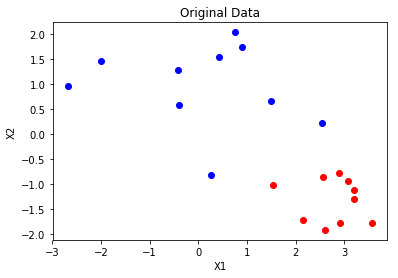

     pcost       dcost       gap    pres   dres
 0: -4.1526e+00 -9.4764e+00  6e+01  6e+00  2e+00
 1: -1.2039e+01 -1.2940e+01  2e+01  2e+00  7e-01
 2: -1.6268e+01 -1.2976e+01  8e+00  8e-01  3e-01
 3: -9.4050e+00 -9.9808e+00  6e-01  2e-15  9e-15
 4: -9.7501e+00 -9.7560e+00  6e-03  4e-16  6e-15
 5: -9.7537e+00 -9.7538e+00  6e-05  3e-15  8e-15
 6: -9.7538e+00 -9.7538e+00  6e-07  2e-15  6e-15
Optimal solution found.
[6.99266849659799e-09, 5.000080817370587e-09, 7.870705199526034, 5.015491391051415e-09, 6.266326339232043e-09, 5.938076219979592e-09, 3.14703388280052e-09, 6.590366081889335e-09, 6.450721865098498e-10, 4.202918667451125e-09, 2.45436930368056e-09, 8.047790504133708, 3.366956958494474e-09, 2.5403677538105693e-09, 3.5890137129342863, 4.336394503413103e-09, 7.358483750722109e-09, 2.7267947477347875e-09, 1.3117173553412222e-08, 7.03317897922278e-09]


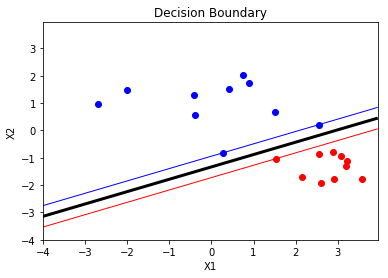

In [4]:
original_plot(classA1,classB1)
support = train_data(data1,'L',0)
boundary_plot(classA1,classB1,support,'L',0)

### 2 Dimension Linearly Non-separable Cluster

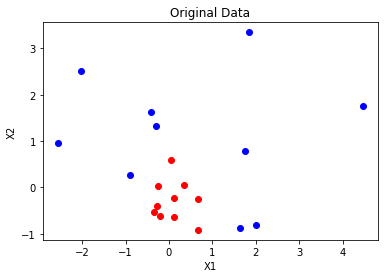

     pcost       dcost       gap    pres   dres
 0: -1.2762e+01 -3.2122e+01  8e+01  7e+00  2e+00
 1: -4.9807e+01 -7.4665e+01  4e+01  4e+00  1e+00
 2: -2.1650e+02 -2.6274e+02  5e+01  3e+00  1e+00
 3: -7.4324e+02 -8.3550e+02  9e+01  3e+00  1e+00
 4: -3.6762e+03 -3.9340e+03  3e+02  3e+00  1e+00
 5: -1.7686e+04 -1.8616e+04  9e+02  3e+00  1e+00
 6: -1.5888e+05 -1.6390e+05  5e+03  3e+00  1e+00
 7: -4.0577e+06 -4.0896e+06  3e+04  3e+00  1e+00
 8: -4.9613e+08 -4.9635e+08  2e+05  3e+00  1e+00
 9: -2.7478e+11 -2.7487e+11  9e+07  3e+00  1e+00
10: -2.7573e+11 -2.7582e+11  9e+07  3e+00  1e+00
11: -2.7574e+11 -2.7583e+11  9e+07  3e+00  1e+00
12: -2.7306e+11 -2.7315e+11  9e+07  3e+00  1e+00
13: -2.9710e+11 -2.9719e+11  1e+08  3e+00  1e+00
14: -6.3389e+11 -6.3406e+11  2e+08  3e+00  1e+00
15: -1.3116e+12 -1.3117e+12  1e+08  3e+00  1e+00
Terminated (singular KKT matrix).
[137618015672.86356, 46256593650.16541, 728682521.1911278, 6253715129.918114, 33144113958.985386, 11940978186.564798, 7062895209.29375

In [5]:
original_plot(classA,classB)
support = train_data(data,'L',0)

# Q3 - Slack Implement

In [4]:
def train_slack_data(data,Option,p,c):   
    P = get_P(data,Option,p)
    # Slack h vector 
    h = np.zeros((2 * len(data), 1))
    h[len(data):] = c
    # Slack G matrix
    G =  np.vstack((np.diag([-1.0]*len(data)),np.diag([1.0]*len(data))))
    q = -1*np.ones((len(data), 1))

    r = qp(matrix(P), matrix(q), matrix(G), matrix(h))
    alpha = list(r['x'])
    print(alpha)

    support = []
    for i in range(len(alpha)):
        if alpha[i] > 10e-5:
            support.append((data[i][0], data[i][1], data[i][2], alpha[i]))
    return support

## Polynomial Kernel with fixed small C and p form 1 to 10

     pcost       dcost       gap    pres   dres
 0: -7.0520e+00 -4.5809e+00  1e+02  1e+01  1e-15
 1: -1.1427e+00 -4.3985e+00  3e+00  1e-15  7e-16
 2: -1.3072e+00 -1.6608e+00  4e-01  1e-16  4e-16
 3: -1.4704e+00 -1.5191e+00  5e-02  8e-17  3e-16
 4: -1.4966e+00 -1.4990e+00  2e-03  8e-17  4e-16
 5: -1.4981e+00 -1.4982e+00  8e-05  1e-16  3e-16
 6: -1.4981e+00 -1.4981e+00  3e-06  1e-16  5e-16
 7: -1.4981e+00 -1.4981e+00  3e-08  1e-16  3e-16
Optimal solution found.
[0.09999999813690282, 0.09999999996488239, 0.09999999939755891, 0.0999999999532014, 0.09580749751026892, 0.09999999825232056, 0.09999999995954616, 0.09999999972980506, 0.09999999987455242, 4.099043964880024e-11, 0.0865832039115314, 0.09999999976832899, 0.09999999867982162, 0.09999999886193511, 0.09999999953433826, 0.09999999839460301, 0.09999999727577476, 0.09999999938838283, 0.09999999981728956, 0.09999999979340243]


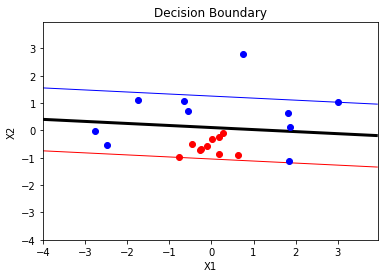

     pcost       dcost       gap    pres   dres
 0: -2.3925e+00 -3.1979e+00  7e+01  8e+00  1e-15
 1: -6.6610e-01 -2.9687e+00  5e+00  3e-01  2e-15
 2: -4.8725e-01 -1.3605e+00  9e-01  1e-16  6e-16
 3: -5.7254e-01 -7.0545e-01  1e-01  8e-17  3e-16
 4: -6.1602e-01 -6.3726e-01  2e-02  8e-17  2e-16
 5: -6.2331e-01 -6.2723e-01  4e-03  8e-17  4e-16
 6: -6.2503e-01 -6.2570e-01  7e-04  8e-17  3e-16
 7: -6.2527e-01 -6.2533e-01  6e-05  8e-17  3e-16
 8: -6.2529e-01 -6.2530e-01  2e-06  9e-17  3e-16
 9: -6.2529e-01 -6.2529e-01  7e-08  6e-17  4e-16
Optimal solution found.
[0.09999999803945506, 0.00518678951119413, 0.09999999573904993, 4.1589008845223944e-10, 3.587025290221564e-10, 3.773015991644798e-08, 0.09342446198766406, 0.0999999986779948, 0.09999999891049918, 1.0280415554617145e-09, 2.725620920898859e-09, 0.09999999825093255, 0.0007182465223807359, 0.018130337781098852, 4.1071175504491517e-10, 0.08494428922859792, 0.09999996694844887, 0.09999999674529012, 0.09999999856587707, 2.752385887227176e-08

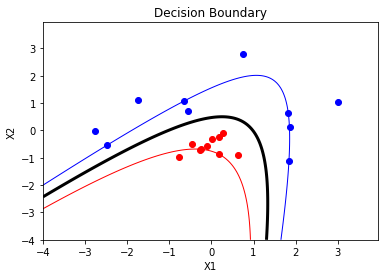

     pcost       dcost       gap    pres   dres
 0: -8.3674e-01 -2.9070e+00  6e+01  8e+00  2e-15
 1: -4.4353e-01 -2.6146e+00  4e+00  2e-01  3e-15
 2: -4.0245e-01 -1.1949e+00  1e+00  4e-02  1e-15
 3: -4.1770e-01 -5.3333e-01  1e-01  4e-03  8e-15
 4: -4.4837e-01 -4.6594e-01  2e-02  5e-04  1e-15
 5: -4.5459e-01 -4.5545e-01  9e-04  2e-05  5e-16
 6: -4.5495e-01 -4.5496e-01  1e-05  2e-07  5e-16
 7: -4.5495e-01 -4.5495e-01  1e-07  2e-09  4e-16
Optimal solution found.
[0.06438037152577342, 0.00812310847267019, 0.09999997213519089, 3.268441455355354e-09, -4.3220249418580114e-11, 4.068751296813779e-08, 0.023786058689125898, 0.09999999712705447, 0.09999999626887042, 3.809554325098023e-10, 1.029261638116737e-08, 0.09999999278503448, 7.136063138388504e-08, 0.010469805468470261, 1.5905562754436145e-09, 0.009870056840437371, 1.0787603147700481e-08, 0.09999999303119499, 0.0999999940594403, 4.5444083578014274e-08]


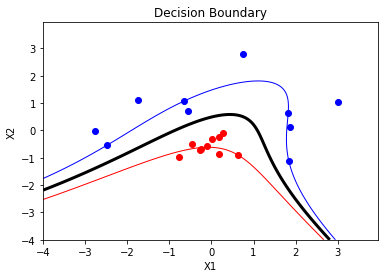

     pcost       dcost       gap    pres   dres
 0: -6.1774e-01 -2.7168e+00  6e+01  7e+00  2e-15
 1: -3.9174e-01 -2.3888e+00  3e+00  2e-01  4e-15
 2: -3.5055e-01 -1.0750e+00  9e-01  5e-02  8e-15
 3: -3.0661e-01 -8.1971e-01  7e-01  2e-02  4e-15
 4: -3.3759e-01 -3.9516e-01  7e-02  2e-03  6e-16
 5: -3.5562e-01 -3.6277e-01  8e-03  1e-04  5e-16
 6: -3.5788e-01 -3.5916e-01  1e-03  4e-06  9e-16
 7: -3.5827e-01 -3.5837e-01  1e-04  3e-07  6e-16
 8: -3.5831e-01 -3.5831e-01  3e-06  4e-09  1e-15
 9: -3.5831e-01 -3.5831e-01  1e-07  4e-11  1e-15
Optimal solution found.
[6.265160111653245e-09, 0.0009555128378936575, 0.08434804000122358, 7.915369046616945e-11, 2.8335502552807014e-11, 1.5181741590655507e-09, 0.002270616483284175, 0.0999999662238667, 0.09999999912290423, 1.084197165008367e-10, 3.836836163356397e-10, 0.09999999849728149, 2.0034313699820573e-09, 0.0011421568461067505, 7.613246727809277e-11, 4.5851947619893194e-10, 1.7711529292207922e-09, 0.0983875136989803, 0.09999999880228998, 0.00122271

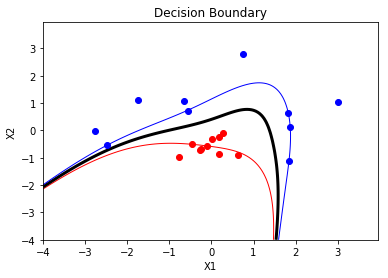

     pcost       dcost       gap    pres   dres
 0: -4.6671e-01 -2.5774e+00  5e+01  7e+00  5e-15
 1: -3.3638e-01 -2.2265e+00  4e+00  2e-01  7e-15
 2: -2.6051e-01 -7.6761e-01  6e-01  2e-02  7e-15
 3: -2.6616e-01 -5.3867e-01  3e-01  6e-03  4e-15
 4: -2.8405e-01 -3.7709e-01  1e-01  1e-03  6e-15
 5: -2.9844e-01 -3.0724e-01  9e-03  9e-05  2e-14
 6: -3.0061e-01 -3.0095e-01  3e-04  6e-17  9e-16
 7: -3.0071e-01 -3.0072e-01  1e-05  7e-17  2e-15
 8: -3.0071e-01 -3.0071e-01  2e-07  6e-17  8e-16
Optimal solution found.
[5.2094379376471986e-09, 0.0002557357959100228, 0.06166561823111992, 6.355259406090749e-10, 4.622137153610731e-10, 8.716397872103542e-09, 0.0005093207568736268, 0.0539809009195614, 0.09999999375763564, 7.646063512462424e-10, 2.2382721790927154e-09, 0.09999999047561155, 1.1169350575470655e-08, 0.0002537753454369003, 4.134093910270033e-10, 2.390473866335575e-09, 6.026180564642621e-09, 0.057373692616486456, 0.09999999174853988, 0.0006604660296684866]


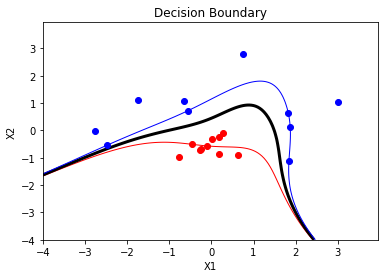

     pcost       dcost       gap    pres   dres
 0: -3.9278e-01 -2.5106e+00  5e+01  7e+00  1e-14
 1: -3.0540e-01 -2.1605e+00  3e+00  2e-01  9e-15
 2: -2.4906e-01 -7.0412e-01  5e-01  2e-02  1e-14
 3: -2.6145e-01 -3.9149e-01  1e-01  5e-03  4e-15
 4: -2.5585e-01 -3.3003e-01  8e-02  1e-03  2e-14
 5: -2.5788e-01 -3.0465e-01  5e-02  5e-04  8e-15
 6: -2.6245e-01 -2.8203e-01  2e-02  1e-04  1e-14
 7: -2.6698e-01 -2.6785e-01  9e-04  3e-06  1e-15
 8: -2.6730e-01 -2.6736e-01  6e-05  2e-07  2e-15
 9: -2.6733e-01 -2.6733e-01  8e-07  2e-09  5e-15
10: -2.6733e-01 -2.6733e-01  9e-09  2e-11  2e-15
Optimal solution found.
[1.0121343961621253e-10, 4.103010440729591e-05, 0.04082196574974409, 1.2033419357854682e-10, 5.298918217341126e-11, 2.8243772758275184e-10, 0.0001210312045000186, 0.02864230448506482, 0.09999999976388178, 1.1739992337928341e-11, 5.3038236358707165e-11, 0.09999999964477944, 3.880558680636983e-10, 3.0961678931020816e-08, 1.3737086991771819e-11, 6.348196549971832e-11, 1.6710928154785893e-1

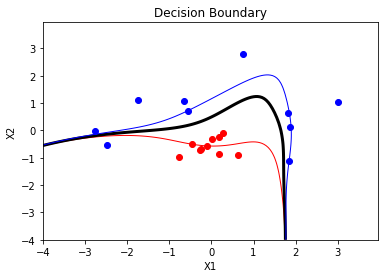

     pcost       dcost       gap    pres   dres
 0: -3.4314e-01 -2.4589e+00  5e+01  7e+00  9e-15
 1: -2.7733e-01 -2.1125e+00  3e+00  2e-01  5e-15
 2: -2.4668e-01 -7.7936e-01  7e-01  3e-02  8e-15
 3: -2.3435e-01 -3.1611e-01  9e-02  2e-03  1e-14
 4: -2.3672e-01 -2.7662e-01  4e-02  3e-04  1e-14
 5: -2.3930e-01 -2.6773e-01  3e-02  1e-04  3e-14
 6: -2.4443e-01 -2.5251e-01  9e-03  3e-05  1e-14
 7: -2.4638e-01 -2.4680e-01  4e-04  9e-17  7e-15
 8: -2.4654e-01 -2.4659e-01  5e-05  6e-17  3e-15
 9: -2.4656e-01 -2.4656e-01  1e-06  1e-16  7e-15
10: -2.4656e-01 -2.4656e-01  4e-08  1e-16  4e-15
Optimal solution found.
[1.5172698627480786e-10, 1.0910753022257346e-05, 0.022253921896269575, 3.1501517932816396e-11, 1.6596490954274923e-11, 3.863084022095806e-10, 3.054885582145852e-05, 0.01533259133176585, 0.09999999966396526, 1.8663632246476975e-11, 6.86166168537311e-11, 0.09999999955513407, 5.30037069395441e-10, 3.105332472274798e-07, 1.173433070049633e-11, 8.205868124448102e-11, 2.3151288328499391e-10, 

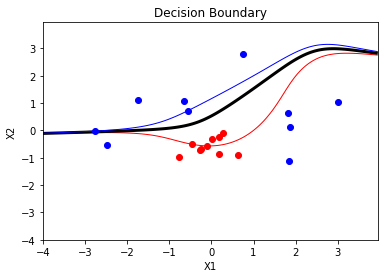

     pcost       dcost       gap    pres   dres
 0: -3.0862e-01 -2.4170e+00  5e+01  7e+00  6e-14
 1: -2.5471e-01 -2.0701e+00  3e+00  1e-01  2e-14
 2: -2.3188e-01 -6.7761e-01  6e-01  3e-02  1e-14
 3: -2.1731e-01 -2.9110e-01  8e-02  8e-04  3e-14
 4: -2.2564e-01 -2.5871e-01  4e-02  3e-04  6e-15
 5: -2.3043e-01 -2.3860e-01  9e-03  3e-05  3e-14
 6: -2.3087e-01 -2.3640e-01  6e-03  1e-05  3e-14
 7: -2.3154e-01 -2.3438e-01  3e-03  5e-06  2e-14
 8: -2.3230e-01 -2.3239e-01  8e-05  5e-08  7e-15
 9: -2.3234e-01 -2.3235e-01  6e-06  3e-09  1e-14
10: -2.3235e-01 -2.3235e-01  7e-08  3e-11  7e-15
Optimal solution found.
[3.3142604645937596e-10, 2.3788247245118344e-06, 0.008746425571327687, 4.827475611551708e-10, 1.432339374039712e-10, 1.3951446704691306e-09, 8.234822933094176e-06, 0.008257937597303389, 0.09999999872530861, 3.23539132803445e-10, 2.1645625319780987e-10, 0.09999999837271448, 2.022262764638538e-09, 1.6296697388956854e-09, 3.5132546972986617e-11, 2.6146999031361657e-10, 7.520402245170813e-1

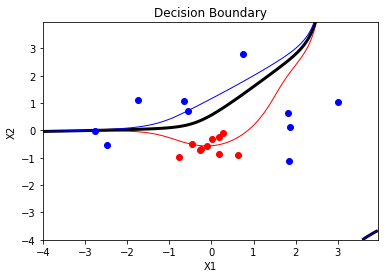

     pcost       dcost       gap    pres   dres
 0: -2.8232e-01 -2.3832e+00  5e+01  7e+00  6e-14
 1: -2.3724e-01 -2.0390e+00  3e+00  2e-01  6e-14
 2: -2.1296e-01 -5.3242e-01  4e-01  2e-02  2e-14
 3: -2.0550e-01 -2.7816e-01  7e-02  4e-04  5e-14
 4: -2.1549e-01 -2.4138e-01  3e-02  1e-04  2e-14
 5: -2.1534e-01 -2.3449e-01  2e-02  2e-05  6e-14
 6: -2.1671e-01 -2.3214e-01  2e-02  1e-05  4e-14
 7: -2.2037e-01 -2.2448e-01  4e-03  2e-06  4e-14
 8: -2.2129e-01 -2.2277e-01  2e-03  4e-07  3e-13
 9: -2.2179e-01 -2.2185e-01  6e-05  6e-09  5e-14
10: -2.2182e-01 -2.2182e-01  6e-06  3e-10  1e-14
11: -2.2182e-01 -2.2182e-01  1e-07  4e-12  7e-15
Optimal solution found.
[2.810779711157376e-10, 6.087599290780764e-07, 3.7979824518856804e-06, 1.7630385120039374e-10, 1.2903303258363063e-10, 1.33478629596758e-09, 2.2284083176911566e-06, 0.004463974679073941, 0.09999999878903917, 9.081928632230022e-10, 1.2809073424172145e-10, 0.09999999860116905, 1.971917367306567e-09, 1.7242748276633902e-09, 1.225860453839915

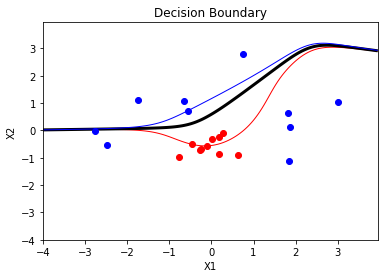

     pcost       dcost       gap    pres   dres
 0: -2.6144e-01 -2.3542e+00  5e+01  7e+00  1e-13
 1: -2.2132e-01 -2.0128e+00  3e+00  2e-01  3e-14
 2: -2.0066e-01 -5.3313e-01  4e-01  2e-02  4e-14
 3: -2.0988e-01 -2.9706e-01  1e-01  5e-03  3e-14
 4: -2.0873e-01 -2.2437e-01  2e-02  8e-05  5e-14
 5: -2.1139e-01 -2.1741e-01  6e-03  3e-05  5e-14
 6: -2.0951e-01 -2.1757e-01  8e-03  6e-06  2e-13
 7: -2.1017e-01 -2.1713e-01  8e-03  4e-06  1e-13
 8: -2.1193e-01 -2.1488e-01  3e-03  7e-07  1e-13
 9: -2.1234e-01 -2.1427e-01  2e-03  3e-07  5e-13
10: -2.1301e-01 -2.1311e-01  1e-04  6e-09  5e-14
11: -2.1306e-01 -2.1307e-01  1e-05  4e-10  3e-14
12: -2.1306e-01 -2.1306e-01  4e-07  3e-12  1e-13
13: -2.1306e-01 -2.1306e-01  7e-09  3e-14  2e-14
Optimal solution found.
[7.1684715630941796e-12, 1.1463715240344014e-07, 3.170380956370102e-10, 1.214449075147245e-11, 1.9140086749229945e-12, 3.584108374786018e-11, 6.279468028044603e-07, 0.0024182560421757474, 0.09999999995029381, 9.52468418582201e-11, 4.534651609

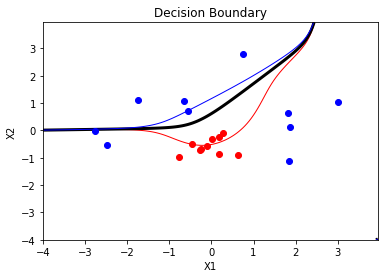

In [16]:
for i in range(1,11):
    support = train_slack_data(data,'P',i, 0.1)
    boundary_plot(classA,classB,support,'P',i)

## Polynomial Kernel with fixed p=3 and C from 0.1 to 1000

     pcost       dcost       gap    pres   dres
 0: -8.3674e-01 -2.9070e+00  6e+01  8e+00  2e-15
 1: -4.4353e-01 -2.6146e+00  4e+00  2e-01  3e-15
 2: -4.0245e-01 -1.1949e+00  1e+00  4e-02  1e-15
 3: -4.1770e-01 -5.3333e-01  1e-01  4e-03  8e-15
 4: -4.4837e-01 -4.6594e-01  2e-02  5e-04  1e-15
 5: -4.5459e-01 -4.5545e-01  9e-04  2e-05  5e-16
 6: -4.5495e-01 -4.5496e-01  1e-05  2e-07  5e-16
 7: -4.5495e-01 -4.5495e-01  1e-07  2e-09  4e-16
Optimal solution found.
[0.06438037152577342, 0.00812310847267019, 0.09999997213519089, 3.268441455355354e-09, -4.3220249418580114e-11, 4.068751296813779e-08, 0.023786058689125898, 0.09999999712705447, 0.09999999626887042, 3.809554325098023e-10, 1.029261638116737e-08, 0.09999999278503448, 7.136063138388504e-08, 0.010469805468470261, 1.5905562754436145e-09, 0.009870056840437371, 1.0787603147700481e-08, 0.09999999303119499, 0.0999999940594403, 4.5444083578014274e-08]


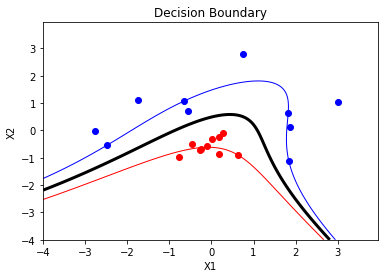

     pcost       dcost       gap    pres   dres
 0: -1.0070e+00 -2.5853e+01  1e+02  2e+00  5e-15
 1: -5.4337e-01 -1.0976e+01  1e+01  1e-01  4e-15
 2: -2.8833e-01 -4.7130e+00  5e+00  3e-02  5e-15
 3: -5.4340e-01 -1.1526e+00  7e-01  2e-03  2e-15
 4: -6.4207e-01 -8.4311e-01  2e-01  7e-04  5e-16
 5: -6.7371e-01 -8.1155e-01  1e-01  3e-04  1e-15
 6: -6.9686e-01 -7.4585e-01  5e-02  9e-05  7e-16
 7: -6.9757e-01 -7.5556e-01  6e-02  7e-05  8e-16
 8: -7.0695e-01 -7.2396e-01  2e-02  2e-05  7e-16
 9: -7.0509e-01 -7.3124e-01  3e-02  1e-05  6e-16
10: -7.0749e-01 -7.2048e-01  1e-02  4e-06  6e-16
11: -7.0721e-01 -7.2842e-01  2e-02  1e-06  1e-15
12: -7.0953e-01 -7.1720e-01  8e-03  4e-07  7e-16
13: -7.0739e-01 -7.2423e-01  2e-02  7e-08  1e-15
14: -7.0837e-01 -7.1836e-01  1e-02  4e-08  4e-16
15: -7.0809e-01 -7.2437e-01  2e-02  2e-16  8e-16
16: -7.0983e-01 -7.1638e-01  7e-03  2e-16  4e-16
17: -7.1053e-01 -7.1448e-01  4e-03  2e-16  6e-16
18: -7.1148e-01 -7.1159e-01  1e-04  2e-16  9e-16
19: -7.1150e-01 -7.11

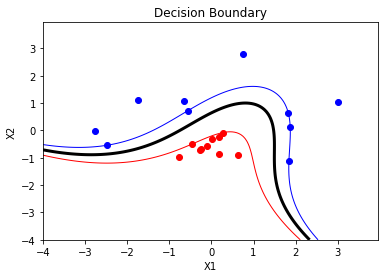

     pcost       dcost       gap    pres   dres
 0:  2.2748e+01 -4.9362e+02  1e+03  2e-01  5e-14
 1:  1.7375e+01 -9.1247e+01  2e+02  3e-02  2e-14
 2:  4.2375e+00 -1.3266e+01  2e+01  8e-04  2e-14
 3: -5.2250e-02 -1.9490e+00  2e+00  1e-06  4e-15
 4: -5.6460e-01 -8.5926e-01  3e-01  1e-07  1e-15
 5: -6.6949e-01 -7.3289e-01  6e-02  2e-08  7e-16
 6: -7.0994e-01 -7.1488e-01  5e-03  2e-16  9e-16
 7: -7.1149e-01 -7.1155e-01  6e-05  2e-16  5e-16
 8: -7.1150e-01 -7.1150e-01  6e-07  2e-16  7e-16
Optimal solution found.
[7.136706842158353e-08, 0.010957303818810455, 5.214992552370768e-08, 4.272282577940308e-09, 2.284366123250451e-09, 4.076903992727809e-08, 0.013951965464962829, 0.24646237117149067, 0.9063475318120962, 3.812340003492226e-09, 3.268431118307271e-08, 9.433397897883837e-08, 4.293948806535171e-08, 0.01335649117629532, 2.845804032566673e-09, 1.088288785760753e-08, 3.068220730079358e-08, 0.2061815275757581, 1.2115886593650905e-07, 0.025749275210601566]


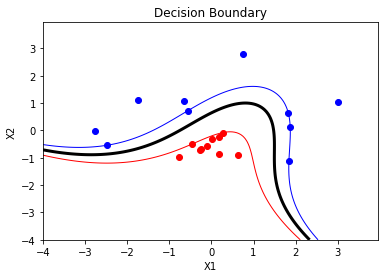

     pcost       dcost       gap    pres   dres
 0:  2.8061e+03 -2.8700e+04  5e+04  1e-01  2e-13
 1:  1.4965e+03 -5.3050e+03  8e+03  1e-02  1e-13
 2:  3.2357e+02 -4.3093e+02  8e+02  3e-04  2e-13
 3:  4.4738e+01 -6.0275e+01  1e+02  2e-16  2e-14
 4:  4.9890e+00 -9.9741e+00  1e+01  2e-16  1e-14
 5: -5.2062e-02 -2.0904e+00  2e+00  2e-16  1e-15
 6: -5.8602e-01 -8.5216e-01  3e-01  2e-16  2e-15
 7: -6.7464e-01 -7.3193e-01  6e-02  2e-16  6e-16
 8: -7.0782e-01 -7.1493e-01  7e-03  2e-16  4e-16
 9: -7.1146e-01 -7.1158e-01  1e-04  2e-16  7e-16
10: -7.1150e-01 -7.1150e-01  1e-06  2e-16  7e-16
11: -7.1150e-01 -7.1150e-01  1e-08  2e-16  1e-15
Optimal solution found.
[1.2811604145385685e-09, 0.010957305373251059, 1.6724145290894087e-09, 9.843839375849915e-11, 3.5795481081873074e-11, 9.917747820925595e-10, 0.013951813382143576, 0.24646242186913356, 0.9063478253495342, 6.339104476275364e-11, 1.16635800802878e-09, 6.036409104811554e-09, 1.1081859677225012e-09, 0.013356111795069773, 5.645909146423356e-11,

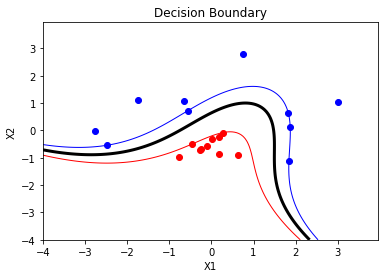

     pcost       dcost       gap    pres   dres
 0:  2.8522e+05 -2.6637e+06  4e+06  9e-02  2e-12
 1:  1.4877e+05 -5.1120e+05  8e+05  1e-02  1e-11
 2:  3.1537e+04 -3.9676e+04  7e+04  2e-04  1e-12
 3:  4.6233e+03 -5.2104e+03  1e+04  2e-16  2e-13
 4:  6.5236e+02 -7.5869e+02  1e+03  2e-16  7e-14
 5:  8.9150e+01 -1.1262e+02  2e+02  2e-16  3e-14
 6:  1.0935e+01 -1.7873e+01  3e+01  2e-16  1e-14
 7:  6.5883e-01 -3.3673e+00  4e+00  2e-16  4e-15
 8: -5.1793e-01 -9.9645e-01  5e-01  2e-16  3e-15
 9: -6.6482e-01 -7.3350e-01  7e-02  2e-16  1e-15
10: -7.0914e-01 -7.1636e-01  7e-03  1e-16  6e-16
11: -7.1147e-01 -7.1158e-01  1e-04  1e-16  1e-15
12: -7.1150e-01 -7.1150e-01  1e-06  2e-16  1e-15
13: -7.1150e-01 -7.1150e-01  1e-08  2e-16  8e-16
Optimal solution found.
[9.965276033713278e-10, 0.010957305427074324, 8.787632704597005e-10, 8.94386383097784e-11, 4.166153345940933e-11, 6.391794454132004e-10, 0.01395181203843026, 0.24646242227272822, 0.9063478313418845, 7.333975942138775e-11, 5.908952845195297e-1

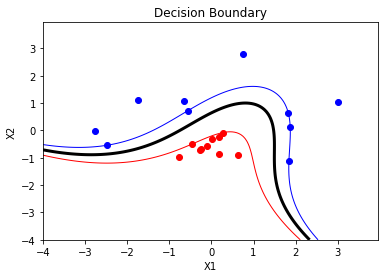

In [19]:
for i in [0.1, 1, 10, 100, 1000]:
    support = train_slack_data(data,'P', 3, i)
    boundary_plot(classA,classB,support,'P',3)

### RBF kernel with p = 1, C = 0.1

     pcost       dcost       gap    pres   dres
 0: -1.0199e+01 -4.2976e+00  9e+01  9e+00  5e-16
 1: -1.5987e+00 -3.9510e+00  2e+00  1e-15  8e-16
 2: -1.8604e+00 -2.0241e+00  2e-01  1e-16  4e-16
 3: -1.9869e+00 -1.9889e+00  2e-03  9e-17  4e-16
 4: -1.9884e+00 -1.9884e+00  2e-05  1e-16  5e-16
 5: -1.9884e+00 -1.9884e+00  2e-07  9e-17  5e-16
Optimal solution found.
[0.09999999130233722, 0.09999999287126207, 0.0999999913606208, 0.09999999308247202, 0.09999999442137991, 0.09999999144681936, 0.09999999345225812, 0.09999999392910704, 0.09999999108059518, 0.09999999434146077, 0.0999999916260586, 0.09999999124344834, 0.09999999142827558, 0.09999999428236209, 0.09999999374240805, 0.0999999939967909, 0.09999999137777028, 0.0999999914302995, 0.09999999117871779, 0.0999999941292824]


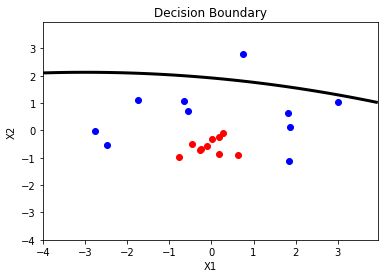

In [13]:
support=train_slack_data(data,'R', 8, 0.1)
boundary_plot(classA,classB,support,'R',8)

### RBF kernel with p = 1, C = 100

     pcost       dcost       gap    pres   dres
 0:  1.2435e+03 -1.9206e+04  2e+04  0e+00  4e-14
 1: -4.6101e+01 -2.6872e+03  3e+03  1e-16  2e-14
 2: -4.7096e+02 -9.7729e+02  5e+02  1e-16  3e-14
 3: -6.0765e+02 -7.9412e+02  2e+02  2e-16  2e-14
 4: -6.6752e+02 -7.5254e+02  9e+01  2e-16  3e-14
 5: -6.8719e+02 -7.2263e+02  4e+01  2e-16  4e-14
 6: -7.0252e+02 -7.0437e+02  2e+00  2e-16  4e-14
 7: -7.0317e+02 -7.0319e+02  2e-02  2e-16  4e-14
 8: -7.0318e+02 -7.0318e+02  2e-04  2e-16  5e-14
Optimal solution found.
[9.03276058382443e-06, 99.99999478421746, 41.49451116874019, 34.736566320728556, 3.2520778155019376e-06, 5.899875294045272e-06, 99.99999760160735, 99.99998304470323, 99.99998976930185, 2.4267692974919577e-06, 5.883093903125839e-06, 99.99997689169902, 6.310206707287921e-06, 13.38669980321424, 9.929578530972751e-06, 6.675897786493948, 7.15003787292476e-06, 99.99992052508343, 99.99998285970034, 99.99999082171861]


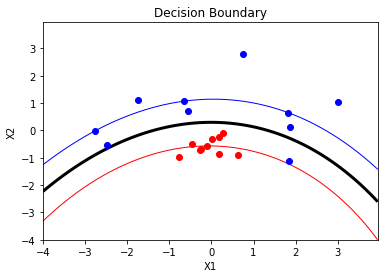

In [12]:
support=train_slack_data(data,'R', 8, 100)
boundary_plot(classA,classB,support,'R',8)

## Q5 Imagine that you are given data that is not easily separable. When should you opt for more slack rather than going for a more complex model and vice versa?
Large C gives a hypothesis of low bias high variance --> overfitting, more accurate
Small C gives a hypothesis of high bias low variance --> underfitting

C controls the cost of misclassification on the training data.
Small C makes the cost of misclassificaiton low, more slack
Large C makes the cost of misclassification high, smaller slack

When you get an complex model which brings higher enough variance, then you want to make the model more general to fit more variaty data(lower noise in training data), then you can choose to increase slack(lower c) to get higher bias and lower variance.

When you get an model with enough slack, the bias of it maybe too high, and this model maybe too simple, then you can increase the complexity of the model to improve the variance.